In [11]:
# Import necessary libraries
from shapely.geometry import Polygon, LineString
import networkx as nx
import matplotlib.pyplot as plt


In [12]:
def generate_racks(rows, cols, rack_size=1000, spacing=500):
    """
    Generates rack polygons for a grid layout.
    :param rows: Number of rows of racks
    :param cols: Number of columns of racks
    :param rack_size: Size of each rack in mm (default: 1000)
    :param spacing: Spacing between racks in mm (default: 500)
    :return: (list of rack polygons, list of rack labels)
    """
    rack_polygons = []
    rack_labels = []

    for row in range(rows):
        for col in range(cols):
            # Bottom-left corner
            x_start = col * (rack_size + spacing)
            y_start = row * (rack_size + spacing)

            # Create a polygon
            rack_polygon = Polygon([
                (x_start, y_start),  # Bottom-left
                (x_start, y_start + rack_size),  # Top-left
                (x_start + rack_size, y_start + rack_size),  # Top-right
                (x_start + rack_size, y_start)  # Bottom-right
            ])
            rack_polygons.append(rack_polygon)
            rack_labels.append(f"Rack-{row+1}-{col+1}")

    return rack_polygons, rack_labels


In [13]:
def generate_obstacles():
    """
    Generate obstacle polygons (e.g., machinery or walls).
    :return: List of obstacle polygons
    """
    obstacles = [
        Polygon([(2000, 2000), (2000, 2500), (2500, 2500), (2500, 2000)])  # Example obstacle
    ]
    return obstacles


In [14]:
def validate_edges(rack_polygons, obstacles):
    """
    Validate edges between rack polygons, avoiding obstacles.
    :param rack_polygons: List of rack polygons
    :param obstacles: List of obstacle polygons
    :return: List of valid edges (tuples of polygon indices)
    """
    valid_edges = []
    for i in range(len(rack_polygons)):
        for j in range(i + 1, len(rack_polygons)):
            # Create a line between centroids of the polygons
            line = LineString([rack_polygons[i].centroid, rack_polygons[j].centroid])

            # Check if the line intersects any obstacle
            if not any(line.intersects(obstacle) for obstacle in obstacles):
                valid_edges.append((i, j))

    return valid_edges


In [15]:
def visualize_racks_with_edges(rack_polygons, rack_labels, valid_edges):
    """
    Visualizes the racks as polygons and the connections as edges.
    :param rack_polygons: List of rack polygons
    :param rack_labels: List of rack labels
    :param valid_edges: List of valid edges
    """
    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot rack polygons
    for i, polygon in enumerate(rack_polygons):
        x, y = polygon.exterior.xy
        ax.fill(x, y, alpha=0.5, fc='lightblue', ec='black')  # Draw polygon
        centroid = polygon.centroid
        ax.text(centroid.x, centroid.y, rack_labels[i], ha='center', fontsize=8)

    # Plot edges between racks
    for edge in valid_edges:
        node1, node2 = edge
        x_coords = [rack_polygons[node1].centroid.x, rack_polygons[node2].centroid.x]
        y_coords = [rack_polygons[node1].centroid.y, rack_polygons[node2].centroid.y]
        ax.plot(x_coords, y_coords, 'r-', linewidth=1)  # Draw edge

    # Set plot limits and show
    ax.set_xlim(-500, (len(rack_polygons)**0.5 * 1500))  # Adjust limits based on layout
    ax.set_ylim(-500, (len(rack_polygons)**0.5 * 1500))
    ax.set_aspect('equal', adjustable='datalim')
    plt.title("Racks and Connections")
    plt.show()


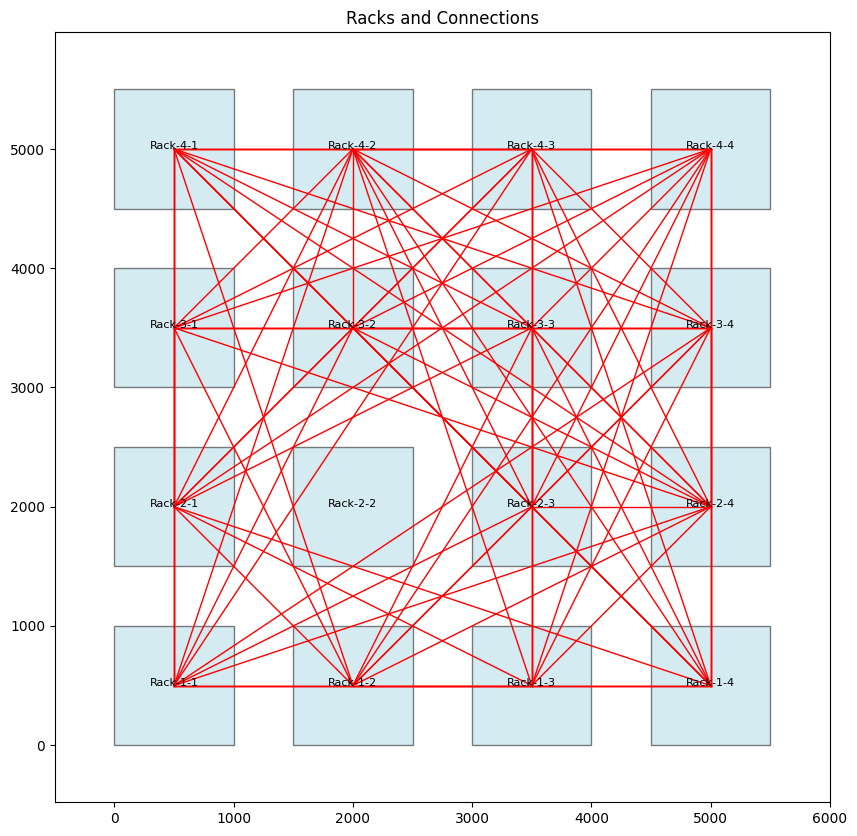

In [16]:
# Generate rack polygons and obstacles
rack_polygons, rack_labels = generate_racks(rows=4, cols=4, rack_size=1000, spacing=500)
obstacles = generate_obstacles()

# Validate edges
valid_edges = validate_edges(rack_polygons, obstacles)

# Visualize the layout with polygons and edges
visualize_racks_with_edges(rack_polygons, rack_labels, valid_edges)


debugging